# FIT 5196 : Assignment 2

#### Name : Potluri Karthik Venkat Chowdary

#### Student ID : 32157738



## Data Cleansing

### 1. Introduction

Cleaning and organising data forms a very importnat part of the data wrangling process. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.  Formally, data cleansing is defined as the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database. Data cleansing can also be referred to as data cleaning, data scrubbing, or data reconciliation. More precisely, the process of data cleansing could be explained as a four stage process:
1. Define and identify errors in data such as incompleteness, incorrectness, inaccuracy or irrelevancy
2. Clean and rectify these error by replacing, modifying, or deleting them
3. Document error instances and error types; and finally
4. Measure and verify to see whether the cleansing meets the user's specified tolerance limits in terms of cleanliness.



<img src="1_adLKKx_Z8FBTN62srHte_w.jpeg" width="400">

### 2. Data Description

The dataset contains Furniture Delivery data from an online furniture store in Melbourne, Australia. The furniture store has five branches around Melbourne area. All five branches share the same catalogs but they have different management so they operate differently. Each instance of the data represents a single order from the online furniture store.

### 3. Import Libraries 

We will be using various libraries in this process 

In [11]:
import pandas as pd
import regex as re
import datetime
import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns

## Dirty Data

Dirty data is a dataset with errors. These errors might have caused due to entry error by humans, or record duplication and improper parsing of data. 

### a. Reading Data
The data is present in the file "32157738_dirty_data.csv" file. This csv file can be parsed using pandas into a dataframe. Let us call this dataframe **"dirty_data"** . 

In [12]:
dirty_data = pd.read_csv("./32157738_dirty_data.csv")

In [13]:
len(dirty_data)

500

In [14]:
dirty_data.head()

,sales_id,date,time,shopping_cart,price,parcel_size,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,nearest_storehouse,dist_to_nearest_storehouse,delivery_cost
0,ORD0098289,23/08/2018,13:20:09,"[('wardrobe', 3), ('Study_table', 1), ('mattre...",3947.95,small,145.13263,-37.97401,1,4,Sunshine,26.30,5.7555
1,ORD0059355,10/06/2021,39:03:49,"[('sofa', 3), ('Study_table', 1), ('wardrobe',...",5905.28,large,-37.44465,146.06201,0,4,Sunshine,109.22,6.3135
2,ORD0047399,17/01/2018,54:00:19,"[('bed', 3), ('Chair', 2), ('mattress', 4)]",3208.60,small,-37.70571,144.67023,1,2,Footscray,30.83,16.5465
3,ORD0017839,25/09/2020,10:04:42,"[('Study_table', 3), ('side_table', 1), ('sofa...",4181.73,L,-38.12096,144.48595,0,2,Footscray,56.47,18.5895
4,ORD0085472,21/10/2019,07:24:16,"[('bed', 1), ('Chair', 2), ('Study_table', 4),...",948.18,small,-37.90113,145.21092,1,6,Sunshine,27.95,5.8635


- Data has 500 rows of information, each row being identified by sales_id.
- We have date that needs to be in the format of 'DD/MM/YY' and time that needs to be in 'hh/mm/ss' format.
- We have order item and their respective quantity and the total bill in shopping_cart and price respectively.
- We have parcel_size column that should have parcel size as "small","meidum" or "Large".
- Then we have customer latitude and logitude, and a isLoyaltyProgram that checks if the customer is a part of the loyalty program.
- Then nearest_storehouse_id and nearest_storehouse to denote the nearest store house.
- dist_to_nearest_storehouse has the distance to the nearest store house and then delivery cost in delivery_cost.

In [15]:
dirty_data.describe()

,price,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,dist_to_nearest_storehouse,delivery_cost
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3103.042780,10.447203,96.921702,0.512000,3.772000,62.999640,10.316209
std,1264.703146,80.871884,80.860036,0.500357,1.321935,28.966575,5.877895
min,353.440000,-38.495180,-38.497270,0.000000,0.000000,4.550000,5.242500
25%,2165.640000,-38.119150,-37.466948,0.000000,3.000000,40.797500,6.187500
50%,3100.340000,-37.716565,144.954905,1.000000,4.000000,59.765000,6.876000
75%,4030.320000,144.536500,145.566460,1.000000,4.000000,81.135000,17.347500
max,6468.850000,146.188340,146.190060,1.000000,6.000000,128.260000,28.215900


### b. Identifying and fixing data issues.

- Since we know that each row can have only one error, we can mark the rows that we corrected and ignore them for the next steps.
- Let us include a new column "corrected" and set it to zero initially.

In [16]:
dirty_data['corrected']  = 0

- Now we are done with that let us get the unique values for sizes and see what all values exist.

#### i) Parcel Size:
- From the above dataset one thing that is very easy to locate and check would be the size.
- In one of the rows above we can see that a column has size as L. However we know that sizes are only allowed to be "small", "medium", "large"
- Let us check the unique values that are present in the parcel_size column.

In [17]:
dirty_data['parcel_size'].unique()

array(['small', 'large', 'L', 'medium', 'S', 'M'], dtype=object)

- From the above result it is clear that the some of the orders have parcel size wrong we will have to substitute, Large for L, Meidum for M and Small for S.
- We will be using a for loop to go through each row and check if the parcel_size has 'L' , 'M' or 'S' in it and change them accordingly.
- During the same we will be changing the value of corrected column from 0 to 1 in rows where we are making changes.

In [18]:
#iterating the entire dataset
for i in range(len(dirty_data)):
    if(dirty_data['parcel_size'][i] == 'L'):          #Checkinf for L
        dirty_data.at[i, 'parcel_size'] = 'large'  
        dirty_data.at[i, 'corrected'] = 1             
    elif(dirty_data['parcel_size'][i] == 'M'):        #Checkinf for M 
        dirty_data.at[i, 'parcel_size'] = 'medium'    
        dirty_data.at[i, 'corrected'] = 1
    elif(dirty_data['parcel_size'][i] == 'S'):        #Checkinf for S
        dirty_data.at[i, 'parcel_size'] = 'small'
        dirty_data.at[i, 'corrected'] = 1
    else:
        continue
        
        
        

- We have changed every row with the correct value for parcel_size and marked them accordingly in 'corrected' column.

#### ii) Nearest Store House

We have 5 stores and their ids given to us in the 'Storehouses' file .Let us parse that file using pandas and call it 'store_house'. Next we will go with unique store house id and nearest store house and check if they match each other. 

In [19]:
store_house = pd.read_csv("../RD/Storehouses.csv")
store_house

,names,lat,lon
0,Clayton,-37.818595,144.969551
1,Eping,-37.812673,144.947069
2,Footscray,-37.809996,144.995232
3,St. Kilda,-37.816495,144.981200
4,Sunshine,-37.813500,144.912500


In [20]:
dirty_data.groupby(['nearest_storehouse_id', 'nearest_storehouse']).size().reset_index().rename(columns={0:'count'})

,nearest_storehouse_id,nearest_storehouse,count
0,0,Clayton,8
1,2,Footscray,113
2,3,St. Kilda,10
3,4,Sunshine,292
4,6,Clayton,1
5,6,Footscray,25
6,6,St. Kilda,2
7,6,Sunshine,49


- From the unique combinations of nearest_storehouse_id and nearest_storehouse, looks like the store 6 is a mistake and the correct ids for stores clayton, footscray, St.kilda and Sunshine are 0,2,3,4 respectively.
- we will change the nearest_storehouse_id from 6 to 0,2,3,4 based on the nearest_storehouse.

In [21]:
for i in range(len(dirty_data)):
    if(dirty_data['nearest_storehouse_id'][i]==6):
        if(dirty_data['nearest_storehouse'][i] == 'Clayton'):          #Checkinf for L
            dirty_data.at[i, 'nearest_storehouse_id'] = 0  
            dirty_data.at[i, 'corrected'] = 1             
        elif(dirty_data['nearest_storehouse'][i] == 'Footscray'):        #Checkinf for M 
            dirty_data.at[i, 'nearest_storehouse_id'] = 2    
            dirty_data.at[i, 'corrected'] = 1
        elif(dirty_data['nearest_storehouse'][i] == 'St. Kilda'):        #Checkinf for S
            dirty_data.at[i, 'nearest_storehouse_id'] = 3
            dirty_data.at[i, 'corrected'] = 1
        elif(dirty_data['nearest_storehouse'][i] == 'Sunshine'):        #Checkinf for S
            dirty_data.at[i, 'nearest_storehouse_id'] = 4
            dirty_data.at[i, 'corrected'] = 1
        else:
            print(i)
    else:
        continue
        

- Let us check if we were able to change the store number across all the stores with id 6.

In [22]:
dirty_data.groupby(['nearest_storehouse_id', 'nearest_storehouse']).size().reset_index().rename(columns={0:'count'})

,nearest_storehouse_id,nearest_storehouse,count
0,0,Clayton,9
1,2,Footscray,138
2,3,St. Kilda,12
3,4,Sunshine,341


- We can see that stores are allocated their actual store ids. 

#### iii) Time
- Since it does not have AM or PM it should have certain restrictions, like hours should be less than 24, minutes less than 60 and so do seconds. 
- Let us check for the same, in the data and see if there are any errors.

In [23]:
# Printing values of times that might have issues
print(dirty_data[pd.to_numeric(dirty_data.time.str[6:8])>59])
print(dirty_data[pd.to_numeric(dirty_data.time.str[3:5])>59])
print(dirty_data[pd.to_numeric(dirty_data.time.str[:2])>23 ])

Empty DataFrame
Columns: [sales_id, date, time, shopping_cart, price, parcel_size, Customer_lat, Customer_long, isLoyaltyProgram, nearest_storehouse_id, nearest_storehouse, dist_to_nearest_storehouse, delivery_cost, corrected]
Index: []
Empty DataFrame
Columns: [sales_id, date, time, shopping_cart, price, parcel_size, Customer_lat, Customer_long, isLoyaltyProgram, nearest_storehouse_id, nearest_storehouse, dist_to_nearest_storehouse, delivery_cost, corrected]
Index: []
       sales_id        date      time  \
1    ORD0059355  10/06/2021  39:03:49   
2    ORD0047399  17/01/2018  54:00:19   
21   ORD0018904  26/03/2018  24:02:25   
34   ORD0087596  11/03/2020  48:01:07   
46   ORD0063211  09/05/2018  30:12:31   
81   ORD0076220  04/06/2021  35:09:57   
84   ORD0011066  10/05/2019  41:06:41   
89   ORD0027342  19/10/2020  34:04:14   
113  ORD0007814  09/04/2020  45:19:32   
115  ORD0002757  24/12/2020  54:07:38   
119  ORD0080376  21/09/2018  54:09:36   
124  ORD0092406  14/03/2020  36:08

- We can notice that the first two prints resulted in an empty data frame, meaning that all the minutes are less than 60 and all the hours are less than 60.
- However thee are values where the hours part of time is greater than 23, which is not permissible.
- It might be that the hours part is mixed up with seconds or minutes. Let us check if the minutes/seconds part of these files follow the rules for hours.

In [24]:
#checking for minutes part of time column where the hours is greater than 23
pd.to_numeric(dirty_data[pd.to_numeric(dirty_data.time.str[:2])>23 ]['time'].str[3:5] )>23

1      False
2      False
21     False
34     False
46     False
81     False
84     False
89     False
113    False
115    False
119    False
124    False
128    False
130    False
131    False
138    False
151    False
157    False
159    False
181    False
183    False
187    False
189    False
192    False
206    False
219    False
234    False
236    False
240    False
255    False
257    False
259    False
303    False
317    False
325    False
327    False
358    False
360    False
388    False
415    False
416    False
418    False
429    False
447    False
458    False
464    False
467    False
474    False
493    False
Name: time, dtype: bool

In [25]:
#checking for minutes part of time column where the hours is greater than 23
pd.to_numeric(dirty_data[pd.to_numeric(dirty_data.time.str[:2])>23 ]['time'].str[6:8] )>23

1       True
2      False
21      True
34     False
46      True
81      True
84      True
89     False
113     True
115     True
119     True
124     True
128    False
130     True
131    False
138     True
151     True
157     True
159    False
181     True
183     True
187     True
189    False
192     True
206    False
219     True
234     True
236    False
240    False
255     True
257    False
259     True
303     True
317     True
325    False
327     True
358     True
360    False
388    False
415     True
416     True
418     True
429     True
447    False
458     True
464     True
467     True
474    False
493    False
Name: time, dtype: bool

- From the above two results it is clear that if there is any wrong substitution it will be between minutes and hours. 
- I will proceed and change the values for the same in the data.
- I will initiate a loop through all the rows and check if the hours part of time column is greater than 23 and then change the order accordingly.

In [26]:
# Initiating for loop across all rows
for i in range(len(dirty_data)):
    if(int(dirty_data['time'][i][:2])>23):    #checking if the hours part is greater than 23
        #changing the order and exchanging hours and minutes.
        dirty_data.at[i, 'time'] = dirty_data['time'][i][3:6]+dirty_data['time'][i][:3]+dirty_data['time'][i][6:8]
        dirty_data.at[i, 'corrected'] = 1 
    else:
        continue              
    

#### iv) Date
Checking date column for any anomalies.
- For date we have to first check whether if it is following the 'DD/MM/YY' pattern. to check this let us use the regex pattern **('^(((0[1-9]|[12][0-9]|30)[/]?(0[13-9]|1[012])|31[/]?(0[13578]|1[02])|(0[1-9]|1[0-9]|2[0-8])[/]?02)[/]?[0-9]{4}|29[/]?02[/]?([0-9]{2}(([2468][048]|[02468][48])|[13579][26])|([13579][26]|[02468][048]|0[0-9]|1[0-6])00))$')** (Regex to Validate Date Format Dd/Mm/Yyyy, 2013)
- This regex checks for days in month as well as for leap years.
- Let us check for dates that does not confirm to this format and see how they are different.

In [27]:
for i in range(len(dirty_data)):
    if re.match('^(((0[1-9]|[12][0-9]|30)[/]?(0[13-9]|1[012])|31[/]?(0[13578]|1[02])|(0[1-9]|1[0-9]|2[0-8])[/]?02)[/]?[0-9]{4}|29[/]?02[/]?([0-9]{2}(([2468][048]|[02468][48])|[13579][26])|([13579][26]|[02468][048]|0[0-9]|1[0-6])00))$',dirty_data.at[i, 'date']):
        continue
    else : 
        print(dirty_data.at[i, 'date'])

2018-07-12
2020-06-16
Sunday 24, 11 2019
Friday 04, 10 2019
2019-06-12
Friday 14, 12 2018
Friday 30, 10 2020
Friday 04, 12 2020
2020-04-17
2020-02-03
Monday 14, 05 2018
Sunday 10, 06 2018
2019-02-26
Thursday 19, 11 2020
Saturday 27, 02 2021
Saturday 18, 07 2020
Wednesday 19, 06 2019
2021-03-07
2019-11-02
Sunday 11, 10 2020
Monday 20, 08 2018
2021-10-24
Thursday 01, 10 2020
2020-07-30
Thursday 13, 12 2018
2018-11-23
Saturday 10, 02 2018
Saturday 25, 08 2018
Friday 06, 09 2019
2020-06-09
2018-05-02
2020-04-18
2019-08-07
2020-03-28
Thursday 11, 04 2019
Wednesday 01, 12 2021
2021-12-19
2018-04-07
2020-02-06
Sunday 09, 06 2019
2018-01-19
Monday 15, 03 2021
Sunday 01, 04 2018
2020-04-14
2020-08-20
Wednesday 22, 08 2018
Wednesday 30, 10 2019
Saturday 11, 08 2018
Monday 02, 03 2020
Thursday 25, 07 2019
Monday 18, 02 2019
2020-11-24
Sunday 13, 10 2019
Saturday 09, 06 2018
2018-04-01
2020-10-26
2021-12-20
2018-03-04
Sunday 21, 07 2019
2021-02-17
Tuesday 06, 07 2021
2020-01-04
Wednesday 24, 10 20

- Looking at the data above it is clear that there are two different formats that date is present in their data apart from the allowed 'DD/MM/YYYY'.
- They are 'YYYY-MM-DD' and 'WEEKDAY DD, MM YYYY' and we have to convert them to 'DD/MM/YYYY' I will use the above regex and make minor changes and detect the above two and convert them into required format.

In [28]:
#for loop to go through each row
for i in range(len(dirty_data)):
    #if to check if the date matches 'DD/MM/YYYY' if yes then continue
    if re.match('^(((0[1-9]|[12][0-9]|30)[/]?(0[13-9]|1[012])|31[/]?(0[13578]|1[02])|(0[1-9]|1[0-9]|2[0-8])[/]?02)[/]?[0-9]{4}|29[/]?02[/]?([0-9]{2}(([2468][048]|[02468][48])|[13579][26])|([13579][26]|[02468][048]|0[0-9]|1[0-6])00))$',dirty_data.at[i, 'date']):
        continue
    #checking if it matches 'yyyy-mm-dd'
    elif re.match('^([0-9]{4}[-/]?((0[13-9]|1[012])[-/]?(0[1-9]|[12][0-9]|30)|(0[13578]|1[02])[-/]?31|02[-/]?(0[1-9]|1[0-9]|2[0-8]))|([0-9]{2}(([2468][048]|[02468][48])|[13579][26])|([13579][26]|[02468][048]|0[0-9]|1[0-6])00)[-/]?02[-/]?29)$',dirty_data.at[i, 'date']):
        dirty_data.at[i, 'date'] = datetime.datetime.strptime(dirty_data.at[i, 'date'], "%Y-%m-%d").strftime("%d/%m/%Y")
        dirty_data.at[i, 'corrected'] = 1
    #else we will convert it from the weekdayformat
    else :
        dirty_data.at[i, 'date'] = datetime.datetime.strptime("Friday 28, 08 2020", "%A %d, %m %Y").strftime("%d/%m/%Y")
        dirty_data.at[i, 'corrected'] = 1


- Now that we have processed the date let us check if all the dates in the column follow the convention of 'DD/MM/YYYY' and a valid date using the code we used initially to check the faulty dates.

In [29]:
for i in range(len(dirty_data)):
    if re.match('^(((0[1-9]|[12][0-9]|30)[/]?(0[13-9]|1[012])|31[/]?(0[13578]|1[02])|(0[1-9]|1[0-9]|2[0-8])[/]?02)[/]?[0-9]{4}|29[/]?02[/]?([0-9]{2}(([2468][048]|[02468][48])|[13579][26])|([13579][26]|[02468][048]|0[0-9]|1[0-6])00))$',dirty_data.at[i, 'date']):
        continue
    else : 
        print(dirty_data.at[i, 'date'])

- It is clear that now all the dates follow the required 'DD/MM/YYYY' format.

#### v) Latitude and Longitudes
- It is known that latitudes should be between -90 to 90 and longitude should be between -180 to 80. 
- let us check the range of both of these columns and see if there are any rows that exceeds the above values.


In [30]:
print("The maximum and minimum value for latitudes are"
      + str(max(abs(dirty_data['Customer_lat'])))+','+ str(min(abs(dirty_data['Customer_lat'])))+ "respectively.")

print("The maximum and minimum value for longitudes are"
      + str(max(abs(dirty_data['Customer_long'])))+','+ str(min(abs(dirty_data['Customer_long'])))+ "respectively.")

The maximum and minimum value for latitudes are146.18833999999998,37.40278respectively.
The maximum and minimum value for longitudes are146.19006000000002,37.406079999999996respectively.


- It looks like some of the latitudes have values greater than 90 or less than -90, let us look at these columns and see what might be the issue.

In [31]:
dirty_data[abs(dirty_data['Customer_lat'])>80].head(5)

,sales_id,date,time,shopping_cart,price,parcel_size,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,nearest_storehouse,dist_to_nearest_storehouse,delivery_cost,corrected
0,ORD0098289,23/08/2018,13:20:09,"[('wardrobe', 3), ('Study_table', 1), ('mattre...",3947.95,small,145.13263,-37.97401,1,4,Sunshine,26.30,5.7555,0
6,ORD0034000,15/05/2018,18:09:36,"[('Study_table', 2), ('Chair', 2), ('Dining_ta...",3360.00,medium,144.49758,-37.68539,1,2,Footscray,45.90,19.1565,0
12,ORD0099081,23/07/2018,08:52:07,"[('bed', 3), ('side_table', 4), ('mattress', 3)]",2758.89,small,145.27832,-37.85167,1,4,Sunshine,32.41,6.2685,0
13,ORD0035535,26/04/2019,03:25:15,"[('side_table', 3), ('Chair', 4), ('Dining_tab...",1117.25,small,144.95448,-38.35135,0,2,Footscray,60.30,18.6705,0
17,ORD0017260,31/01/2020,22:11:12,"[('wardrobe', 2), ('sofa', 2), ('bed', 4), ('s...",4462.00,large,144.77928,-38.29612,1,2,Footscray,57.27,17.4285,0


- It appears as though latitude and longitude got exchanged for some of the 

In [32]:
list_col = dirty_data.columns
dirty_data['new_lat'] =dirty_data.apply(lambda x:  
                                        x['Customer_lat'] if abs(x['Customer_lat'])<=80 else x['Customer_long'] ,axis=1)

dirty_data['new_long'] =dirty_data.apply(lambda x:  
                                         x['Customer_long'] if abs(x['Customer_lat'])<=80 else x['Customer_lat'] ,axis=1)

dirty_data['corrected'] =dirty_data.apply(lambda x:  1  if ((x['corrected'] == 1) 
                                                            or (abs(x['Customer_lat'])>80 and x['corrected'] == 0)) 
                                          else 0 ,axis=1)

dirty_data = dirty_data.drop(columns=['Customer_long', 'Customer_lat'])

dirty_data = dirty_data.rename(columns={'new_long': 'Customer_long', 'new_lat': 'Customer_lat'})

dirty_data = dirty_data[list_col]

We have corrected longitude and latitdue for customers 

#### vi) Distance to the nearest store house.

We have the correct latitudes and longitudes for customers, let us check if the column dist_to_nearest_storehouse has the corrext values. To do that we need to be able to calculate distance between two points based on latitude and longitude. Let us write a function that takes in customer latitude, longitude and storehouse name and gives out the distance between those too. 

In [33]:
def distance(lat,long,store_name):
    #get the latitude and longitude of the store
    lat_store = store_house[store_house.names == store_name]['lat'].iloc[0]
    long_store = store_house[store_house.names == store_name]['lon'].iloc[0]
    #defining radius
    R = 6371
    lat1 = math.radians(lat)
    lon1 = math.radians(long)
    lat2 = math.radians(lat_store)
    lon2 = math.radians(long_store)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return(distance)

- Let us check the distance at each row and see if it matches, otherwise we will count the rows where it does not match

In [34]:
j = 0
k = 0
corr = 0
for i in range(len(dirty_data)):
    if round(distance(dirty_data.at[i, 'Customer_lat'],dirty_data.at[i, 'Customer_long'],dirty_data.at[i, 'nearest_storehouse']),2) == dirty_data.at[i, 'dist_to_nearest_storehouse'] :
        k = k+1
        continue
        
        
    else : 
        j = j+1



print("Number of orders with matching distance is "+str(k)
      +" and the number of stores with distances not matching are "+str(j))

Number of orders with matching distance is 437 and the number of stores with distances not matching are 63


- We have 63 with distances not matching, Let us change the distance to calculated distance for these rows and change the corrected column accordingly

In [35]:
for i in range(len(dirty_data)):
    if round(distance(dirty_data.at[i, 'Customer_lat']
                      ,dirty_data.at[i, 'Customer_long']
                      ,dirty_data.at[i, 'nearest_storehouse']),2) == dirty_data.at[i, 'dist_to_nearest_storehouse'] :
        continue
        
    else : 
        dirty_data.at[i,'dist_to_nearest_storehouse'] = round(distance(dirty_data.at[i, 'Customer_lat']
                                                                       ,dirty_data.at[i, 'Customer_long']
                                                                       ,dirty_data.at[i, 'nearest_storehouse']),2)
        dirty_data.at[i, 'corrected'] = 1

- Let us extract seasons of all the orders, this will help us find out the relationship between season, store and distance from store to discount price. 
- Months '01', '02', '12' will be summer, months '03', '04', '05' will be autumn, months '06', '07', '08' will be Winter and '09', '10', '11' will be spring. 

#### vii) Shopping_cart

Shopping cart is a list of tuples, each tuple contains the item name and the quantity purchased. We know that the price column is correct. So we have to check for item name and quantity. 

##### Relation between shopping cart and price.

let us assume each Item has a cost which is constant across stores and years. So for any given row Price should follow the following logic:
$$
Price = \sum^n_{i=1}Cost_{item} \times Quantity_{item}
$$

We need to find out the cost of the each item to actually check whether the price column is matching shopping cart column.

We will be using linalg of ```numpy``` library to obtain the prices. We will use the corrected rows to build the linear model and then check for the rows that are not corrected.

In [36]:
def sep_item_quantity(shopping_list):
    '''
    Creating a function that takes in a list of dictionaries and gives out item names and their quantity as a matrix.
    '''
    shopping_lst_dict =[dict(i) for i in shopping_list]
    
    dictvectorizer = DictVectorizer(sparse=False)
    
    features = dictvectorizer.fit_transform(shopping_lst_dict)
    item_quantity = features
    item_names = dictvectorizer.get_feature_names()
    return([item_quantity,item_names])

In [37]:
#getting a subset of data that has corrected rows
dirty_data_c = dirty_data[dirty_data['corrected']==1]
dirty_data_c.index = range(len(dirty_data_c))

In [38]:
# extracting all columns in shopping cart and forming list of list
shopping_lst = [ eval(dirty_data_c['shopping_cart'][j]) for j in range ( len ( dirty_data_c))]

items_outlier = sep_item_quantity(shopping_lst)

items_quantity = items_outlier[0]
# a = items quantities (500x10)
items = items_outlier[1]
# item names

In [39]:
items_name = np.array(items)

order_price = np.array(dirty_data_c.price)


In [40]:
#using np linalg to get the item price for each item
item_price = np.linalg.lstsq(items_quantity,order_price,rcond=None)[0]

In [41]:
print(item_price )
items_name

[ 89.2  109.56  71.99 381.92 471.11  49.95 339.49 281.92]


array(['Chair', 'Dining_table', 'Study_table', 'bed', 'mattress',
       'side_table', 'sofa', 'wardrobe'], dtype='<U12')

Now that we have individual prices for each qunatity we can calaculate new price for each row and check if it is matching existing price column.

In [42]:
dirty_data_d = dirty_data[dirty_data['corrected']== 0]
dirty_data_d.index = range(len(dirty_data_d))

In [43]:
# extracting all columns in shopping cart and forming list of list
shopping_lst = [ eval(dirty_data_d['shopping_cart'][j]) for j in range ( len ( dirty_data_d))]

items_outlier = sep_item_quantity(shopping_lst)

items_quantity = items_outlier[0]
# a = items quantities (500x10)
items = items_outlier[1]
# item names

Let us the method we used earlier to get items and their quantity for every row where the data has not been corrected before. We can calculate the prices for each row and compare it with the prices in dirty_data_d to check if there are any differences.

In [44]:
list1 = list()
for i in (items_quantity*item_price):
    list1.append(round(sum(i),2))

In [45]:
#A for loop to check if the actual values match with the calculated ones
for i in range(len(dirty_data_d)):
    if(dirty_data_d['price'][i]==list1[i]):
        continue
    else:
        print(i)

Looking that there is no result from the above we are sure that there are no issues in the shopping_cart column.

In [46]:
sum(dirty_data['corrected'])

465

We have corrected 465 columns so far and possible 35 more to correct.

In [47]:
dirty_data

,sales_id,date,time,shopping_cart,price,parcel_size,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,nearest_storehouse,dist_to_nearest_storehouse,delivery_cost,corrected
0,ORD0098289,23/08/2018,13:20:09,"[('wardrobe', 3), ('Study_table', 1), ('mattre...",3947.95,small,-37.97401,145.13263,1,4,Sunshine,26.30,5.7555,1
1,ORD0059355,10/06/2021,03:39:49,"[('sofa', 3), ('Study_table', 1), ('wardrobe',...",5905.28,large,-37.44465,146.06201,0,4,Sunshine,109.22,6.3135,1
2,ORD0047399,17/01/2018,00:54:19,"[('bed', 3), ('Chair', 2), ('mattress', 4)]",3208.60,small,-37.70571,144.67023,1,2,Footscray,30.83,16.5465,1
3,ORD0017839,25/09/2020,10:04:42,"[('Study_table', 3), ('side_table', 1), ('sofa...",4181.73,large,-38.12096,144.48595,0,2,Footscray,56.47,18.5895,1
4,ORD0085472,21/10/2019,07:24:16,"[('bed', 1), ('Chair', 2), ('Study_table', 4),...",948.18,small,-37.90113,145.21092,1,4,Sunshine,27.95,5.8635,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD0071467,04/03/2019,16:04:07,"[('Dining_table', 4), ('side_table', 1), ('war...",770.11,small,-37.64484,146.09352,1,4,Sunshine,105.54,5.9985,1
496,ORD0062699,20/05/2021,01:58:02,"[('Chair', 1), ('mattress', 2), ('Dining_table...",1995.56,medium,-38.08212,144.63084,0,2,Footscray,44.01,19.1385,1
497,ORD0047602,04/08/2021,12:46:03,"[('Study_table', 4), ('side_table', 4), ('bed'...",3964.08,large,-38.37522,144.77619,1,2,Footscray,65.71,18.4005,1
498,ORD0076621,17/01/2020,11:35:20,"[('Study_table', 3), ('Chair', 1), ('bed', 3),...",2914.21,medium,-37.51985,145.06685,1,4,Sunshine,35.37,7.0065,1


In [48]:
dirty_data_final = dirty_data.drop(['corrected'],axis = 1)

Writing the final dirty_data dataframe to a csv file.

In [49]:
dirty_data_final.to_csv('32157738_dirty_data_solution.csv',index=False)

## Missing Data

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. A data scientists job is to decide whether to impute or drop the missing data. We can impute the missing data if it is a dependant on other variables existing in the data. 

### a. Reading Data:

Data we are using in this project for missing data is in the csv file ```32157738_missing_data.csv```. This file can be parsed using the pandas into a dataframe. Data format is similar to that of the dirty data. After reading the data we can notice there are null values only in Price and delivery_cost. We have prices for individual items to calculate price and the linear regression model to calculate the delivery_cost.

In [50]:
missing_data = pd.read_csv("./32157738_missing_data.csv")

In [51]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_id                    300 non-null    object 
 1   date                        300 non-null    object 
 2   time                        300 non-null    object 
 3   shopping_cart               300 non-null    object 
 4   price                       293 non-null    float64
 5   parcel_size                 300 non-null    object 
 6   Customer_lat                300 non-null    float64
 7   Customer_long               300 non-null    float64
 8   isLoyaltyProgram            300 non-null    int64  
 9   nearest_storehouse_id       300 non-null    int64  
 10  nearest_storehouse          300 non-null    object 
 11  dist_to_nearest_storehouse  300 non-null    float64
 12  delivery_cost               283 non-null    float64
dtypes: float64(5), int64(2), object(6)


In [52]:
missing_data.describe()

,price,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,dist_to_nearest_storehouse,delivery_cost
count,293.000000,300.000000,300.000000,300.000000,300.000000,300.000000,283.000000
mean,3156.653038,-37.942978,145.351867,0.500000,3.443333,63.841500,9.866010
std,1332.039053,0.316058,0.493765,0.500835,0.957346,28.388734,5.683951
min,528.690000,-38.498340,144.449590,0.000000,0.000000,5.640000,5.260500
25%,2178.120000,-38.205435,144.948577,0.000000,2.750000,42.270000,6.237000
50%,3161.880000,-37.933260,145.380110,0.500000,4.000000,62.375000,6.808500
75%,4132.920000,-37.699680,145.779198,1.000000,4.000000,84.287500,16.668000
max,6421.580000,-37.408540,146.176150,1.000000,4.000000,130.700000,28.287900


### b. Imputing Missing data

#### i) Imputing price values

We have the price for each item which we derived earlier in the dirty data part. We can use the same values to compute the price of each order. Item name and item price are present in items_name and item_price lists.

In [53]:
items_name
item_price

array([ 89.2 , 109.56,  71.99, 381.92, 471.11,  49.95, 339.49, 281.92])

In [54]:
# extracting all columns in shopping cart and forming list of list
shopping_lst = [ eval(missing_data['shopping_cart'][j]) for j in range ( len ( missing_data))]

items_outlier = sep_item_quantity(shopping_lst)

items_quantity = items_outlier[0]
# a = items quantities (500x10)
items = items_outlier[1]
# item names

Now that we have the items_quantity, let us calculate the price for all columns and assign it to the price column in missing_data file.

In [55]:
list1 = list()
for i in (items_quantity*item_price):
    list1.append(round(sum(i),2))

In [56]:
#assigning values to the price column from calculated column.
missing_data['price']=list1

#### ii) Imputing delivery cost values

To Impute missing values for delivery costs we need to build a linear regression model that will help us calculate the delivery cost

In [57]:
missing_data_mod = missing_data[(missing_data['nearest_storehouse'] != 'NaN')& 
                                (missing_data['dist_to_nearest_storehouse'] != 'NaN') &
                                (missing_data['delivery_cost'] != 'NaN') &
                                (missing_data['date'] != 'NaN') 
                               ]
len(missing_data_mod)

300

We have about 300 rows from missing_data that we can use for the model as well as 465 columns from dirty_data we already corrected. We can use both of these dataframes and get the linear model.

In [58]:
dirty_data_mod = dirty_data[dirty_data['corrected']==1]

dirty_data_mod = dirty_data_mod.drop(['corrected'], axis=1)


In [59]:
frames= [dirty_data_mod,missing_data_mod]
df_linmod = pd.concat(frames)
df_linmod = df_linmod[(df_linmod['nearest_storehouse']=='Sunshine')|(df_linmod['nearest_storehouse']=='Footscray')]
df_linmod = df_linmod.dropna(thresh=1)
df_linmod = df_linmod.reset_index()

Let us add the season column and then remove the columns that we do not need for the linear model. Assuming that the loyalty program value is correct in all of these rows let us get the non-adjusted delivery cost at each row and use it for the analysis. Since it is known that rows that have 1 in 'isLoyaltyProgram' gets a 10% discount. We will adjust these columns to actual values had they have no discount

In [60]:
#adding seasons
df_linmod['season'] =df_linmod.apply(lambda x:  "Summer" if x['date'][3:5] in ('01','02','12') 
                                     else ("Autumn" if x['date'][3:5] in ('03','04','05') 
                                           else ("Winter" if x['date'][3:5] in ('06','07','08') 
                                                 else("Spring" if x['date'][3:5] in ('09','10','11') 
                                                      else "season2"))),axis=1)

In [61]:
#adding adjusted delivery cost
df_linmod['adj_delivery'] =df_linmod.apply(lambda x:  x['delivery_cost'] if x['isLoyaltyProgram']==0 
                                           else x['delivery_cost']*10/9 ,axis=1)

In [62]:
df_linmod = df_linmod.drop(['index','sales_id','date','time','shopping_cart','price','parcel_size',
                           'Customer_lat','Customer_long','nearest_storehouse_id','delivery_cost','isLoyaltyProgram'],axis =1)

In [63]:
df_linmod = pd.get_dummies(df_linmod,prefix=['season'],columns=['season'])
df_linmod = pd.get_dummies(df_linmod,prefix=['store'],columns=['nearest_storehouse'])
df_linmod = df_linmod.dropna(thresh=1)

In [64]:
df_linmod = df_linmod[~df_linmod['adj_delivery'].isna()]

df_linmod = df_linmod.reset_index()
#df_linmod

In [65]:
#separating Dependent and Independent Variables for the modelling.
#Independent Variables
X_lin = df_linmod.loc[:,['dist_to_nearest_storehouse','season_Autumn','season_Spring','season_Summer',
                         'season_Winter','store_Footscray','store_Sunshine']]

#Dependent Variables

Y_lin = df_linmod.loc[:,['adj_delivery']]

To see how well we can divide the data into test and train and calibarate our train and test size (Brownlee, 2020). Here I have changed my test_size between 0.15 to 0.3 and finally settled for 0.22 where my model is giving the least mean squared error.

In [66]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lin, Y_lin, test_size=0.22, random_state=1)

#train_test_split(y, shuffle=False)

In [67]:
#Generating a linear model
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn import linear_model
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train1,y_train1)

LinearRegression()

In [68]:
y_pred = regr_model.predict(X_test1)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test1, y_pred))
print(r2_score(y_test1, y_pred))


0.583573548192803
0.976560694320849


Now using the above model  we will predict the values for missing rows.

In [70]:
missing_data['season'] =missing_data.apply(lambda x:  "Summer" if x['date'][3:5] in ('01','02','12') else ("Autumn" if x['date'][3:5] in ('03','04','05') else ("Winter" if x['date'][3:5] in ('06','07','08') else("Spring" if x['date'][3:5] in ('09','10','11') else "season2"))),axis=1)

In [71]:
missing_data_calc = pd.get_dummies(missing_data,prefix=['season'],columns=['season'])
missing_data_calc = pd.get_dummies(missing_data_calc,prefix=['store'],columns=['nearest_storehouse'])

In [72]:
missing_data_calc['calculated_delivery'] = 0

missing_data_calc['calculated_delivery'] = regr_model.predict(missing_data_calc.loc[:,['dist_to_nearest_storehouse','season_Autumn','season_Spring','season_Summer',
                         'season_Winter','store_Footscray','store_Sunshine']])

missing_data['calculated_delivery'] = missing_data_calc['calculated_delivery']

This calculated delivery cost is not adjusted for loyalty, let us adjust it for that and then proceed to fill missing delivery cost values.

In [73]:
missing_data['calculated_delivery'] =missing_data.apply(lambda x:  x['calculated_delivery'] if x['isLoyaltyProgram']==0 else x['calculated_delivery']*9/10 ,axis=1)

In [74]:
missing_data['delivery_cost'] =missing_data.apply(lambda x:  x['calculated_delivery'] if pd.isnull(x['delivery_cost']) else x['delivery_cost'] ,axis=1)

In [75]:
missing_data = missing_data.drop(columns=['season', 'calculated_delivery'])

In [76]:
missing_data

,sales_id,date,time,shopping_cart,price,parcel_size,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,nearest_storehouse,dist_to_nearest_storehouse,delivery_cost
0,ORD0097577,01/04/2021,21:33:42,"[('Chair', 2), ('Dining_table', 1), ('mattress...",759.07,small,-38.13677,145.83075,1,4,Sunshine,88.15,7.150500
1,ORD0076455,21/12/2019,12:22:04,"[('mattress', 1), ('Chair', 4), ('bed', 2), ('...",1879.71,small,-38.44031,145.24574,1,4,Sunshine,75.55,5.619904
2,ORD0067094,14/04/2019,05:29:37,"[('side_table', 4), ('wardrobe', 4), ('Chair',...",1505.88,small,-37.66793,145.02102,0,4,Sunshine,18.79,6.538500
3,ORD0022905,05/11/2020,13:48:54,"[('Chair', 2), ('mattress', 2), ('Dining_table...",3274.04,medium,-37.89575,145.11072,1,4,Sunshine,19.66,7.411500
4,ORD0021648,07/05/2020,20:55:56,"[('mattress', 4), ('Study_table', 4), ('wardro...",3756.78,medium,-37.45684,146.11782,0,4,Sunshine,113.30,5.935500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ORD0040019,05/12/2021,04:19:47,"[('mattress', 1), ('sofa', 3), ('wardrobe', 3)...",3074.06,medium,-37.68397,145.38118,1,4,Sunshine,43.65,5.485500
296,ORD0023141,03/06/2018,20:31:17,"[('Chair', 1), ('side_table', 4), ('sofa', 3),...",4023.27,large,-38.37541,145.75300,0,4,Sunshine,96.51,7.177500
297,ORD0058992,25/04/2020,01:01:47,"[('mattress', 4), ('Chair', 1), ('wardrobe', 2...",4995.54,large,-38.37470,145.17238,1,4,Sunshine,66.42,7.078500
298,ORD0065275,09/04/2018,13:19:22,"[('Dining_table', 3), ('Study_table', 4), ('so...",2308.54,medium,-38.06817,145.82129,1,4,Sunshine,84.58,6.709500


We have imputed all the missing values in the file using the independant variables. Let us write into a csv file`

In [77]:
missing_data.to_csv('32157738_missing_data_solution.csv',index=False)

## Outlier Data

In statistics occurs when there are values that are really high in some places. These are not erros however, having these values while implementing any statistical or predictive analysis will skew the result. Hence, it is advised to remove outliers when preparing data for analysis.

### a. Reading Data:
Data we are using in this project for outlier data is in the csv file ```32157738_outlier_data.csv```. This file can be parsed using the pandas into a dataframe. Data format is similar to that of the dirty data. from the data outliers are possible for very few columns such as Price, Distance to nearest storehouse and delivery cost.

In [78]:
outlier_data = pd.read_csv("./32157738_outlier_data.csv")
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_id                    200 non-null    object 
 1   date                        200 non-null    object 
 2   time                        200 non-null    object 
 3   shopping_cart               200 non-null    object 
 4   price                       200 non-null    float64
 5   parcel_size                 200 non-null    object 
 6   Customer_lat                200 non-null    float64
 7   Customer_long               200 non-null    float64
 8   isLoyaltyProgram            200 non-null    int64  
 9   nearest_storehouse_id       200 non-null    int64  
 10  nearest_storehouse          200 non-null    object 
 11  dist_to_nearest_storehouse  200 non-null    float64
 12  delivery_cost               200 non-null    float64
dtypes: float64(5), int64(2), object(6)


In [79]:
outlier_data.describe()

,price,Customer_lat,Customer_long,isLoyaltyProgram,nearest_storehouse_id,dist_to_nearest_storehouse,delivery_cost
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3143.074050,-37.933008,145.251016,0.500000,3.290000,59.987300,10.869037
std,1256.236833,0.297179,0.529239,0.501255,0.943585,28.867241,11.276017
min,447.470000,-38.495440,144.451080,0.000000,2.000000,8.190000,-37.355500
25%,2162.460000,-38.182372,144.719982,0.000000,2.000000,36.262500,6.284250
50%,3067.175000,-37.920455,145.221165,0.500000,4.000000,57.215000,7.011000
75%,3999.122500,-37.672780,145.705200,1.000000,4.000000,79.520000,17.894250
max,6208.880000,-37.408840,146.176570,1.000000,4.000000,128.260000,61.394500


### a. Reading Data:

To check for outliers one of the best ways to do is using box plots. let us check for outliers in price first as it is not dependant on any other column except shopping_cart. we can plot box plots to see in which direction the outliers are present and how many.

Outliers can be defined as items that are way farther away from the inter quartile range. Mathematically speaking in any distribution points that are outside the range of $(Q_{1}-1.5IQR,Q_{3}+1.5IQR)$ are outliers. Where $Q_1$ is first quartile value and $Q_3$ is third Quartile value and $IQR$ is inter quartile range. A box plot displays the same in a graphical manner. The box part of the graph signifies $Q_1$ to $Q_3$ and the whiskers of the plot signify the range of 1.5 IQR on either side.

#### i) Price
Let us start with price column to check for any outliers. I am plotting price on y chart of box plot and stores on x-axis this will give us outliers if any across stores. 

<AxesSubplot:xlabel='nearest_storehouse', ylabel='price'>

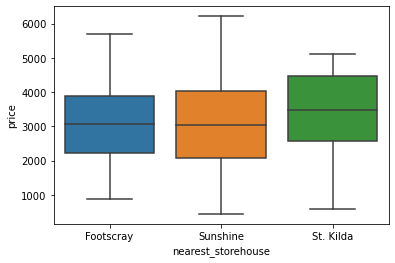

In [80]:
sns.boxplot(y = 'price',x = 'nearest_storehouse',data=outlier_data)

From the plot above it is clear that there are no outliers in price column. 

#### ii) Distance to nearest store house

Let us check for distance to nearest store house. Plotting distance on Y-axis and storehouses on X-axis.

<AxesSubplot:xlabel='nearest_storehouse', ylabel='dist_to_nearest_storehouse'>

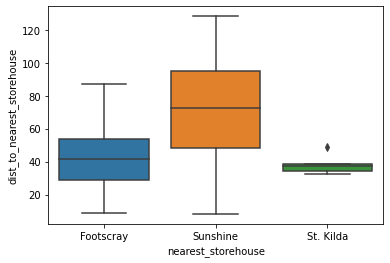

In [81]:
sns.boxplot(y = 'dist_to_nearest_storehouse',x = 'nearest_storehouse',data=outlier_data)

From the plot there are no outliers in Footscray and Sunshine but looks like there are some in St. Kilda. Let's filter for only that store and check. Howver if we look at the outlier it is still in range when compared to other stores.

Number of rows that have nearest storehosue as St. Kilda are  6


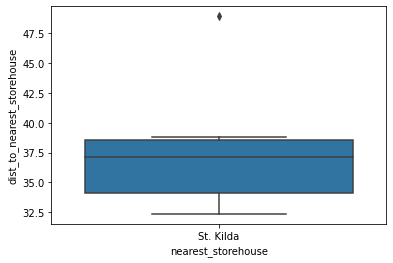

In [82]:
sns.boxplot(y = 'dist_to_nearest_storehouse',x = 'nearest_storehouse',
            data=outlier_data[outlier_data['nearest_storehouse']=='St. Kilda'])
print("Number of rows that have nearest storehosue as St. Kilda are "
      ,len(outlier_data[outlier_data['nearest_storehouse']=='St. Kilda']))


Given the number of rows are only 6 and the value is still in range when compared to other store houses it does not make sense to remove that row. 

#### iii) Delivery cost 

Since Delivery is a multivariate variable we have to calculate the residuals and then remove the outliers from among them.

In [83]:
outlier_data['season'] =outlier_data.apply(lambda x:  "Summer" if x['date'][3:5] in ('01','02','12') else ("Autumn" if x['date'][3:5] in ('03','04','05') else ("Winter" if x['date'][3:5] in ('06','07','08') else("Spring" if x['date'][3:5] in ('09','10','11') else "season2"))),axis=1)

In [84]:
frames= [dirty_data_mod,missing_data_mod]
df_linmod = pd.concat(frames)
df_linmod = df_linmod[df_linmod['nearest_storehouse']!='Clayton']
df_linmod = df_linmod.dropna(thresh=1)
df_linmod = df_linmod.reset_index()

Let us add the season column and then remove the columns that we do not need for the linear model. Assuming that the loyalty program value is correct in all of these rows let us get the non-adjusted delivery cost at each row and use it for the analysis. Since it is known that rows that have 1 in 'isLoyaltyProgram' gets a 10% discount. We will adjust these columns to actual values had they have no discount

In [85]:
#adding seasons
df_linmod['season'] =df_linmod.apply(lambda x:  "Summer" if x['date'][3:5] in ('01','02','12') 
                                     else ("Autumn" if x['date'][3:5] in ('03','04','05') 
                                           else ("Winter" if x['date'][3:5] in ('06','07','08') 
                                                 else("Spring" if x['date'][3:5] in ('09','10','11') 
                                                      else "season2"))),axis=1)

In [86]:
#adding adjusted delivery cost
df_linmod['adj_delivery'] =df_linmod.apply(lambda x:  x['delivery_cost'] if x['isLoyaltyProgram']==0 
                                           else x['delivery_cost']*10/9 ,axis=1)

In [87]:
df_linmod = df_linmod.drop(['index','sales_id','date','time','shopping_cart','price','parcel_size',
                           'Customer_lat','Customer_long','nearest_storehouse_id','delivery_cost','isLoyaltyProgram'],axis =1)

In [88]:
df_linmod = pd.get_dummies(df_linmod,prefix=['season'],columns=['season'])
df_linmod = pd.get_dummies(df_linmod,prefix=['store'],columns=['nearest_storehouse'])
df_linmod = df_linmod.dropna(thresh=1)

In [89]:
df_linmod = df_linmod[~df_linmod['adj_delivery'].isna()]

df_linmod = df_linmod.reset_index()
#df_linmod

In [90]:
#separating Dependent and Independent Variables for the modelling.
#Independent Variables
X_lin = df_linmod.loc[:,['dist_to_nearest_storehouse','season_Autumn','season_Spring','season_Summer',
                         'season_Winter','store_Footscray','store_Sunshine','store_St. Kilda']]

#Dependent Variables

Y_lin = df_linmod.loc[:,['adj_delivery']]

To see how well we can divide the data into test and train and calibarate our train and test size (Brownlee, 2020). Here I have changed my test_size between 0.15 to 0.3 and finally settled for 0.2 where my model is giving the least mean squared error.

In [91]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lin, Y_lin, test_size=0.20, random_state=1)

#train_test_split(y, shuffle=False)

In [92]:
#Generating a linear model
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn import linear_model
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train1,y_train1)

LinearRegression()

In [93]:
y_pred = regr_model.predict(X_test1)

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test1, y_pred))
print(r2_score(y_test1, y_pred))


0.737029870148515
0.9804596569474658


In [95]:
outlier_data_calc = pd.get_dummies(outlier_data,prefix=['season'],columns=['season'])
missing_data_calc = pd.get_dummies(outlier_data_calc,prefix=['store'],columns=['nearest_storehouse'])

In [96]:
outlier_data_calc['calculated_delivery'] = 0

outlier_data_calc['calculated_delivery'] = regr_model.predict(missing_data_calc.loc[:,['dist_to_nearest_storehouse','season_Autumn','season_Spring','season_Summer',
                         'season_Winter','store_Footscray','store_Sunshine','store_St. Kilda']])

outlier_data['calculated_delivery'] = outlier_data_calc['calculated_delivery']

This calculated delivery has been not adjusted for loyalty, let us make that change and calculate the residuals

In [97]:
outlier_data['calculated_delivery'] = outlier_data.apply(lambda x:  x['calculated_delivery'] if x['isLoyaltyProgram']==0 
                                                         else x['calculated_delivery']*9/10 ,axis=1)

After calculating the calculated delivery and adjusting it for loyalty, next calculate residual by calculating the difference between delivery_cost and calculated_delivery and plot it to see any outliers.

In [98]:
outlier_data['residuals'] = outlier_data['delivery_cost']-outlier_data['calculated_delivery']

<AxesSubplot:ylabel='residuals'>

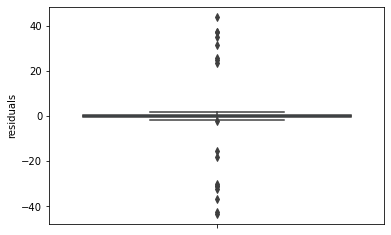

In [99]:
sns.boxplot(y = 'residuals', data=outlier_data)

From the look of the graph it is clear that there are a lot of outliers, let's calculate the lower and upper range for the box plot using a function below. We will calculate $Q_1, Q_3 and IQR$ and use it to calculate lower and upper range.

In [100]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [101]:
filter_value = outlier_treatment(outlier_data['residuals'])

Using the lower and upper range to filter out the rows with outlier residuals.

In [102]:
outlier_data1 = outlier_data[(outlier_data['residuals']>filter_value[0])&
                             (outlier_data['residuals']<filter_value[1])].drop(columns =
                                                                               ['season','calculated_delivery','residuals'],)

Now that we have eliminated the outlier values let us right the final result into a csv file.

In [103]:
outlier_data1.to_csv('32157738_outlier_data_solution.csv',index=False)

# work in progress

### References :

- Regex to validate date format dd/mm/yyyy. (2013, March 19). Stack Overflow. https://stackoverflow.com/questions/15491894/regex-to-validate-date-format-dd-mm-yyyy

- Nair, P. (2019, June 12). Hands-on : Outlier Detection and Treatment in Python Using 1.5 IQR rule. Medium. https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

- Brownlee, J. (2020, August 26). Train-Test Split for Evaluating Machine Learning Algorithms. Machine Learning Mastery. https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/